## 머신러닝
# 학습/테스트 데이터 분리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아이리스 데이터
- 아이리스는 총 150개의 샘플이다
- 이 중 일부분을 검증(테스트) 용으로 따로 떼어놓는다

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target) # 25% for test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

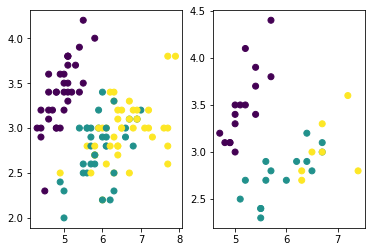

In [8]:
plt.subplot(1,2,1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

### 로지스틱회귀 적용
- fit() : 학습데이터
- predict(), score() : 테스트데이터

In [9]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target) # 25% for test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2])

In [21]:
model.score(X_test, y_test)

0.7631578947368421

In [22]:
model.score(X_train, y_train)

0.8303571428571429

In [14]:
y_test

array([2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2])

In [15]:
(y_test==y_pred).mean()

0.7631578947368421

In [17]:
import mglearn

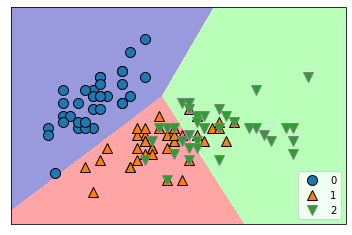

In [19]:
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.legend(loc=4)

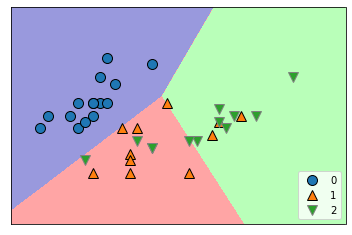

In [20]:
mglearn.plots.plot_2d_classification(model, X_train, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.legend(loc=4)

### 데이터분리시 주의할점
- 앞에서 train_test_split() 함수는 랜덤하게 데이터를 분리한다
- 데이터를 분리할때 특정 클래스가 한쪽으로 몰리면 제대로 학습이 되지 않는다

In [24]:
X_train = iris.data[:100, :2]
y_train = iris.target[:100]
X_test = iris.data[100:, :2]
y_test = iris.target[100:]

In [25]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

> 학습 데이터에 클래스-2가 없으므로 학습이 되지 않는다